In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('spotify.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [2]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()
#there is no null values but have 27 duplicate values which is dropped

0

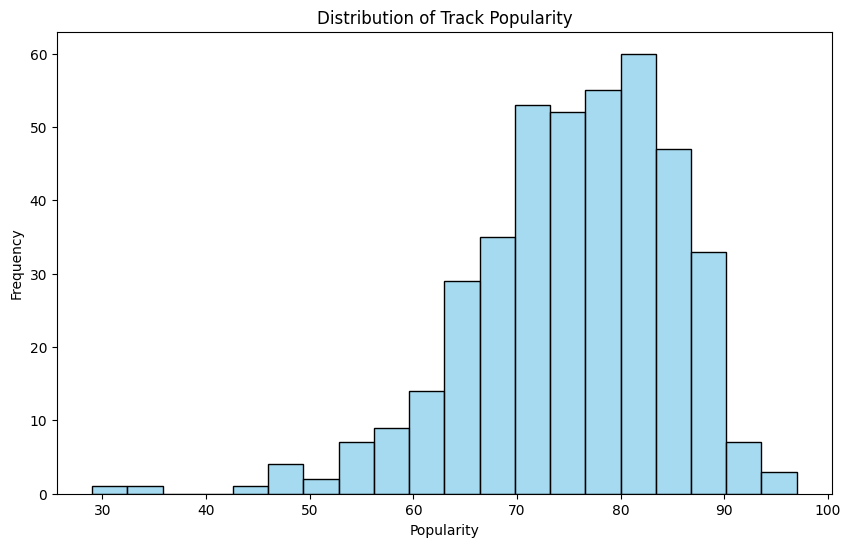

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 438
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         413 non-null    object
 1   Track Name     413 non-null    object
 2   Popularity     413 non-null    int64 
 3   Duration (ms)  413 non-null    int64 
 4   Track ID       413 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.4+ KB


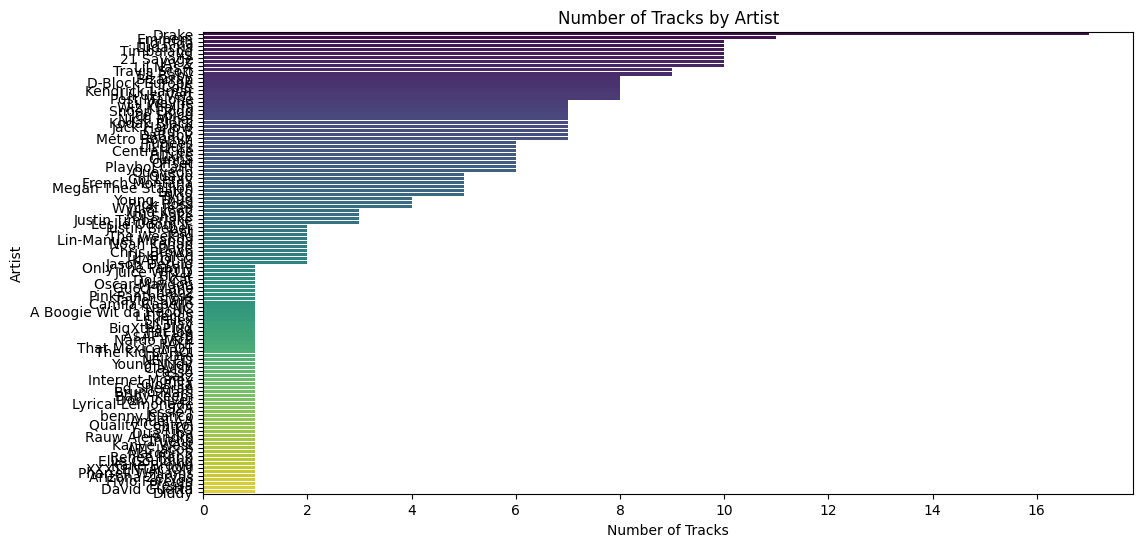

Artist with the highest number of tracks: Drake (17 tracks)


In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df["Artist"], order=df["Artist"].value_counts().index, palette="viridis")

plt.xlabel("Number of Tracks")
plt.ylabel("Artist")
plt.title("Number of Tracks by Artist")
plt.show()

# Find the artist with the highest number of tracks
top_artist = df["Artist"].value_counts().idxmax()
top_count = df["Artist"].value_counts().max()

print(f"Artist with the highest number of tracks: {top_artist} ({top_count} tracks)")

In [9]:
least_popular_tracks = df.nsmallest(5, "Popularity")[["Artist", "Track Name", "Popularity"]]

# Display results
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks)

Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [10]:


# Calculate the average popularity for each artist
artist_avg_popularity = df.groupby("Artist")["Popularity"].mean()

# Sort by average popularity in descending order
top_5_artists = artist_avg_popularity.sort_values(ascending=False).head(5)

# Display results
print("Top 5 Most Popular Artists (by Average Popularity):")
print(top_5_artists)

# Identify the artist with the highest average popularity
most_popular_artist = top_5_artists.idxmax()
highest_avg_popularity = top_5_artists.max()

print(f"\nArtist with the highest average popularity: {most_popular_artist} ({highest_avg_popularity:.2f})")


Top 5 Most Popular Artists (by Average Popularity):
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64

Artist with the highest average popularity: cassö (92.00)


In [11]:
top_5_artists = df.groupby("Artist")["Popularity"].mean().sort_values(ascending=False).head(5).index

# Find the most popular track for each of the top 5 artists
most_popular_tracks = df.loc[df.groupby("Artist")["Popularity"].idxmax(), ["Artist", "Track Name", "Popularity"]]

# Filter only for the top 5 artists
most_popular_tracks = most_popular_tracks[most_popular_tracks["Artist"].isin(top_5_artists)]

# Display results
print("Most Popular Track for Each of the Top 5 Artists:")
print(most_popular_tracks)

Most Popular Track for Each of the Top 5 Artists:
           Artist                    Track Name  Popularity
200  David Guetta            Baby Don't Hurt Me          87
30   Travis Scott    FE!N (feat. Playboi Carti)          93
241        Trueno  Mamichula - con Nicki Nicole          89
140         cassö                         Prada          92
260            ¥$                      CARNIVAL          96


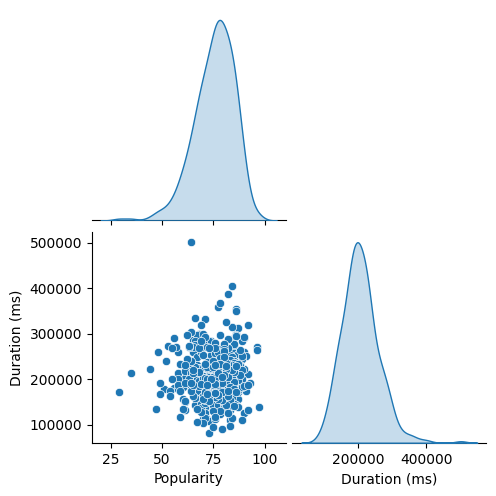

In [12]:
numerical_cols = ["Popularity", "Duration (ms)"]  # Add more numerical columns if available

# Generate pair plot
sns.pairplot(df[numerical_cols], diag_kind="kde", markers="o", corner=True)

# Show the plot
plt.show()

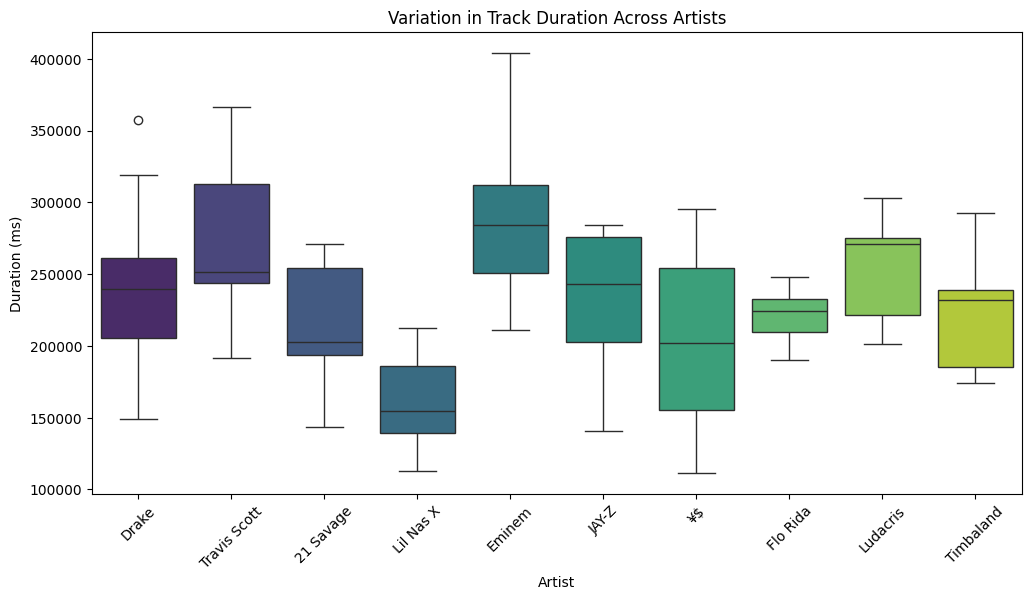

In [13]:
top_artists = df["Artist"].value_counts().head(10).index
filtered_df = df[df["Artist"].isin(top_artists)]

# Set figure size
plt.figure(figsize=(12, 6))

# Create a box plot to show variation in track duration across artists
sns.boxplot(x="Artist", y="Duration (ms)", data=filtered_df, palette="viridis")

# Improve readability
plt.xticks(rotation=45)
plt.title("Variation in Track Duration Across Artists")
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")

# Show the plot
plt.show()

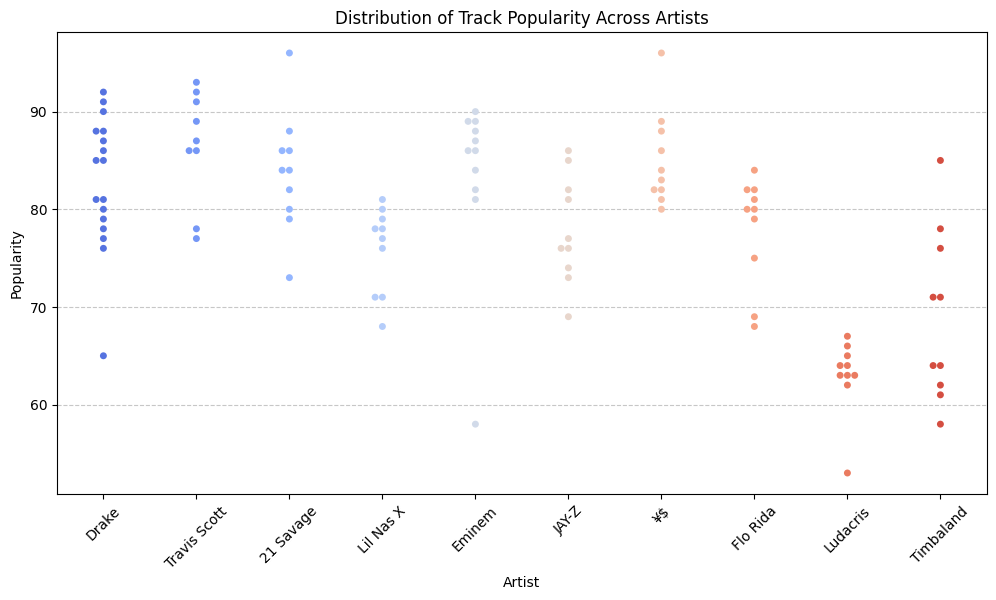

In [14]:


# Select the top 10 artists with the most tracks
top_artists = df["Artist"].value_counts().head(10).index
filtered_df = df[df["Artist"].isin(top_artists)]

# Set figure size
plt.figure(figsize=(12, 6))

# Create a swarm plot
sns.swarmplot(x="Artist", y="Popularity", data=filtered_df, palette="coolwarm")

# Improve readability
plt.xticks(rotation=45)
plt.title("Distribution of Track Popularity Across Artists")
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add horizontal grid lines

# Show the plot
plt.show()
